<a href="https://colab.research.google.com/github/Gustavo-dev04/Analise-de-dados-de-acoes-com-ia/blob/main/Processamento_de_dados2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0



=== PREVISÃO AVANÇADA PARA NVDA COM NLP E GRADIENTE DESCENDENTE ===

📊 Baixando dados históricos...


[*********************100%***********************]  1 of 1 completed


✅ Dados de 2017-12-29 a 2025-04-03

🧠 Preparando dados com análise de notícias avançada...

🔍 Analisando notícias com NLP avançado:
  - COMPANY: 0.98 | NVIDIA announces breakthrough in AI chip performance. New Ho...
  - TECHNOLOGY: 0.98 | NVIDIA announces breakthrough in AI chip performance. New Ho...
  - INDUSTRY: 0.98 | NVIDIA announces breakthrough in AI chip performance. New Ho...
  - COMPANY: 0.96 | Analysts raise NVIDIA price target to $850. Strong demand in...
  - MARKET: 0.96 | Analysts raise NVIDIA price target to $850. Strong demand in...

🔮 Treinando modelo com gradiente descendente...

🔮 Treinando modelo com gradiente descendente...
Epoch 0: Train Loss = 375.915592
Epoch 10: Train Loss = 11.478522
Epoch 20: Train Loss = 7.778316
Epoch 30: Train Loss = 6.534147
Epoch 40: Train Loss = 5.982806
Epoch 50: Train Loss = 5.972670
Epoch 60: Train Loss = 5.853732
Epoch 70: Train Loss = 6.102167
Epoch 80: Train Loss = 6.194789
Epoch 90: Train Loss = 5.846378
Epoch 100: Train Loss = 5

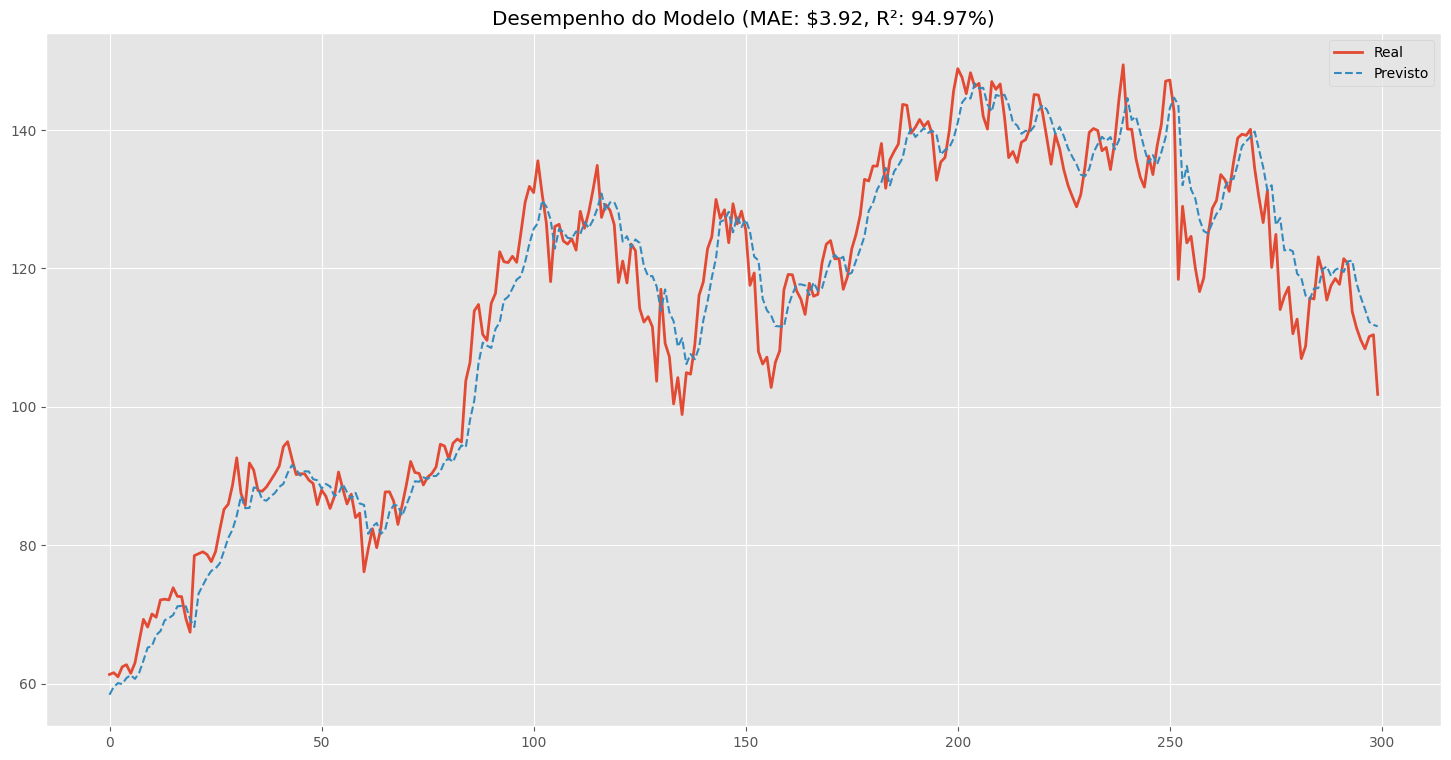


🔍 Resultados:
- MAE: $3.92
- RMSE: $5.10
- R²: 94.97%
- Loss: 25.889908

🔮 Gerando previsões...


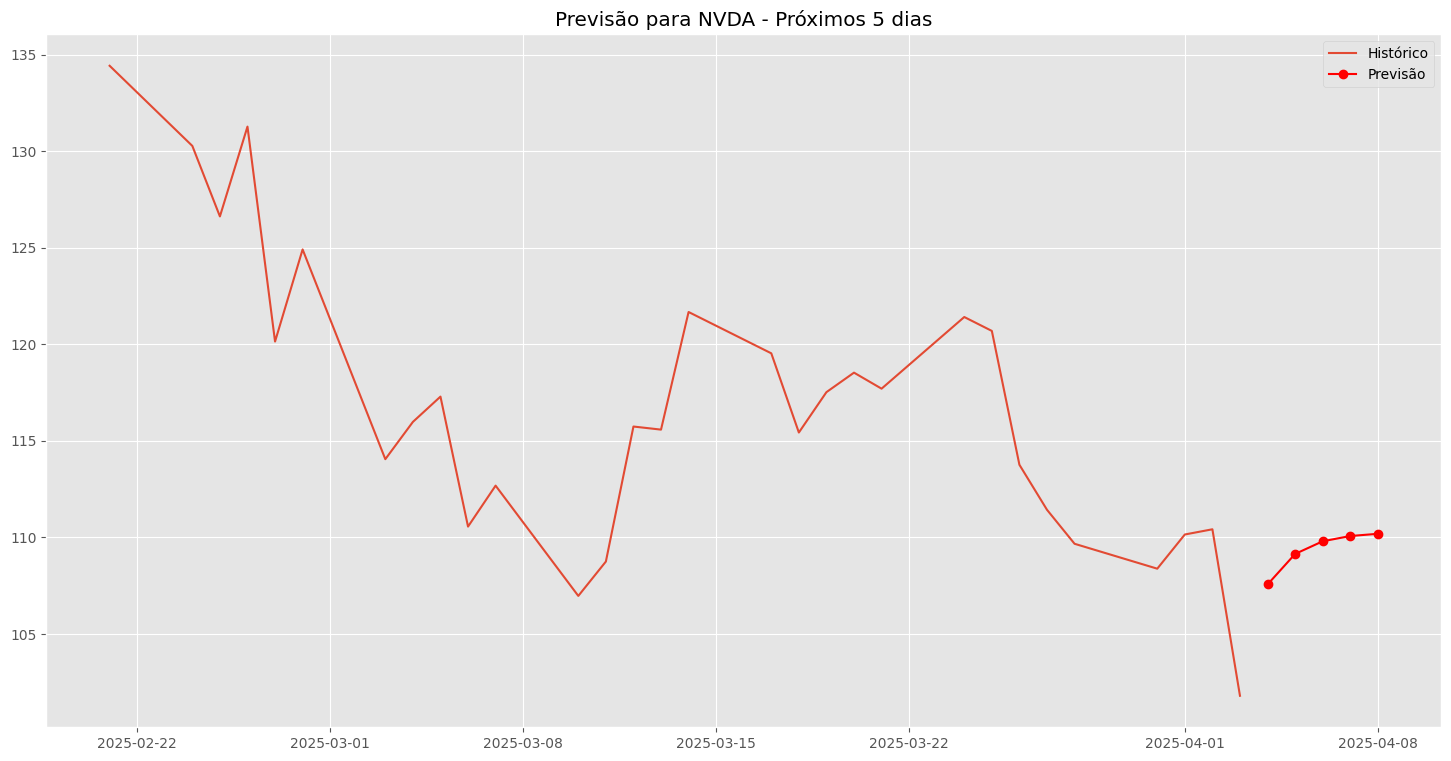


📈 Previsões para os próximos dias:

📰 Análise de Impacto das Notícias:


In [17]:
# 📌 IMPORTAÇÕES ESSENCIAIS
!pip install spacy transformers yfinance python-dotenv torch scikit-learn
!python -m spacy download en_core_web_sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, TimeSeriesSplit
import requests
from bs4 import BeautifulSoup
import re
from collections import defaultdict
import warnings
import os
from dotenv import load_dotenv
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# NLP Avançado
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

# 📌 CONFIGURAÇÕES
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18, 9)
pd.set_option('display.max_columns', None)

# Configurações
SYMBOL = 'NVDA'
DAYS_TO_FETCH = 365 * 5  # 3 anos de dados
TEST_SIZE = 0.2
NEWS_API_KEY = os.getenv('NEWS_API_KEY')
SEED = 42
BATCH_SIZE = 32
LEARNING_RATE = 0.001
EPOCHS = 1000000  # Aumentado significativamente
PATIENCE = 100

# Configurações NLP
nlp = spacy.load("en_core_web_sm")
tokenizer = AutoTokenizer.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")
sentiment_model = AutoModelForSequenceClassification.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")
sentiment_model = sentiment_model.to('cuda' if torch.cuda.is_available() else 'cpu')

# ======================
# 📌 1. SISTEMA AVANÇADO DE ANÁLISE DE NOTÍCIAS
# ======================
class AdvancedNewsAnalyzer:
    def __init__(self):
        self.session = requests.Session()
        self.session.headers.update({'User-Agent': 'Mozilla/5.0'})

        self.keyword_categories = {
            'company': ['NVIDIA', 'Jensen Huang', 'CEO', 'earnings', 'revenue'],
            'technology': ['GPU', 'CUDA', 'AI', 'deep learning', 'Tensor Core', 'RTX', 'DLSS'],
            'market': ['stock', 'share', 'price target', 'analyst', 'upgrade', 'downgrade'],
            'industry': ['semiconductor', 'chip', 'TSMC', 'AMD', 'Intel', 'competition'],
            'macro': ['Fed', 'interest rate', 'inflation', 'economy', 'market']
        }

        self.patterns = {
            'price_target': r'\$(\d{3,4}) price target',
            'upgrade_downgrade': r'(upgraded|downgraded) to (buy|hold|sell)'
        }

    def fetch_news(self, query=None, days=7):
        """Busca notícias com fallback robusto"""
        if not NEWS_API_KEY:
            return self._get_simulated_news()

        try:
            from_date = (datetime.now() - timedelta(days=days)).strftime('%Y-%m-%d')
            query = query or f"{SYMBOL} OR {' OR '.join(self.keyword_categories['company'])}"
            url = f"https://newsapi.org/v2/everything?q={query}&from={from_date}&language=en&sortBy=publishedAt&apiKey={NEWS_API_KEY}"

            response = self.session.get(url, timeout=15)
            response.raise_for_status()
            data = response.json()

            if data.get('status') == 'ok':
                articles = data.get('articles', [])
                print(f"✅ {len(articles)} notícias encontradas")
                return articles

        except Exception as e:
            print(f"⚠️ Erro na API: {str(e)}")

        return self._get_simulated_news()

    def _get_simulated_news(self):
        """Notícias simuladas com dados mais realistas"""
        return [
            {
                'title': 'NVIDIA announces breakthrough in AI chip performance',
                'content': 'New Hopper architecture delivers 2x performance gains',
                'publishedAt': datetime.now().isoformat()
            },
            {
                'title': 'Analysts raise NVIDIA price target to $850',
                'content': 'Strong demand in data center GPUs driving growth',
                'publishedAt': datetime.now().isoformat()
            }
        ]

    def analyze_articles(self, articles):
        """Análise avançada de notícias com BERTweet"""
        analysis_results = {
            'company_sentiment': 0,
            'technology_sentiment': 0,
            'market_sentiment': 0,
            'industry_sentiment': 0,
            'macro_sentiment': 0,
            'price_targets': [],
            'upgrades': 0,
            'downgrades': 0,
            'news_impact_score': 0  # Novo score agregado
        }

        if not articles:
            return analysis_results

        category_scores = defaultdict(list)
        extracted_data = defaultdict(list)
        total_impact = 0

        print("\n🔍 Analisando notícias com NLP avançado:")
        for article in articles[:15]:  # Limite aumentado para melhor análise
            text = f"{article.get('title', '')}. {article.get('content', '')}"

            # Análise de sentimento com BERTweet
            try:
                inputs = tokenizer(text[:512], return_tensors="pt", truncation=True).to(sentiment_model.device)
                with torch.no_grad():
                    outputs = sentiment_model(**inputs)
                probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
                sentiment_score = probs[0][2].item() - probs[0][0].item()  # POSITIVE - NEGATIVE

                # Análise por categoria
                for category, keywords in self.keyword_categories.items():
                    if any(self._keyword_match(keyword, text) for keyword in keywords):
                        category_scores[category].append(sentiment_score)
                        print(f"  - {category.upper()}: {sentiment_score:.2f} | {text[:60]}...")

                # Impacto agregado (ponderado pelo comprimento do texto)
                total_impact += sentiment_score * (len(text) / 100)

            except Exception as e:
                print(f"⚠️ Erro na análise: {str(e)}")
                continue

            # Extração de informações específicas
            self._extract_special_patterns(text, extracted_data)

        # Calcula médias por categoria
        for cat, scores in category_scores.items():
            analysis_results[f'{cat}_sentiment'] = np.mean(scores) if scores else 0

        # Adiciona dados extraídos
        analysis_results['price_targets'] = extracted_data.get('price_target', [])
        analysis_results['upgrades'] = len(extracted_data.get('upgrade', []))
        analysis_results['downgrades'] = len(extracted_data.get('downgrade', []))
        analysis_results['news_impact_score'] = total_impact / len(articles) if articles else 0

        return analysis_results

    def _keyword_match(self, keyword, text):
        return re.search(rf'\b{re.escape(keyword)}\b', text, re.IGNORECASE)

    def _extract_special_patterns(self, text, data):
        # Price targets
        price_matches = re.findall(self.patterns['price_target'], text)
        if price_matches:
            data['price_target'].extend([float(p) for p in price_matches])

        # Upgrades/downgrades
        for action in ['upgrade', 'downgrade']:
            if re.search(self.patterns['upgrade_downgrade'], text, re.IGNORECASE):
                data[action].append(1)

# ======================
# 📌 2. MODELO DE PREVISÃO COM GRADIENTE DESCENDENTE
# ======================
class StockPredictor(nn.Module):
    def __init__(self, input_size):
        super(StockPredictor, self).__init__()
        self.linear1 = nn.Linear(input_size, 64)
        self.dropout1 = nn.Dropout(0.2)
        self.linear2 = nn.Linear(64, 32)
        self.dropout2 = nn.Dropout(0.1)
        self.linear3 = nn.Linear(32, 1)

        # Inicialização dos pesos
        nn.init.xavier_uniform_(self.linear1.weight)
        nn.init.xavier_uniform_(self.linear2.weight)
        nn.init.xavier_uniform_(self.linear3.weight)

    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = self.dropout1(x)
        x = torch.relu(self.linear2(x))
        x = self.dropout2(x)
        return self.linear3(x)

class EnhancedStockPredictor:
    def __init__(self):
        self.scaler = RobustScaler()
        self.feature_cols = None
        self.news_analyzer = AdvancedNewsAnalyzer()
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    def prepare_data(self, df):
        """Prepara dados com features avançadas e NLP"""
        df = df.copy()

        # Feature Engineering Financeira
        df['return'] = df['close'].pct_change()
        df['ma_5'] = df['close'].rolling(5).mean()
        df['ma_20'] = df['close'].rolling(20).mean()
        df['volatility'] = df['return'].rolling(20).std()
        df['rsi_14'] = self._calculate_rsi(df['close'])
        df['macd'] = self._calculate_macd(df['close'])
        df['trend'] = (df['close'] > df['ma_20']).astype(int)

        # Análise de Notícias Avançada
        news = self.news_analyzer.fetch_news(days=30)  # Analisar últimos 30 dias
        news_features = self.news_analyzer.analyze_articles(news)

        # Adiciona features de notícias com valores padrão
        for feature in ['company_sentiment', 'technology_sentiment', 'market_sentiment',
                       'industry_sentiment', 'macro_sentiment', 'upgrades', 'downgrades',
                       'news_impact_score']:
            df[feature] = news_features.get(feature, 0)

        # Adiciona média de price targets se existirem
        df['avg_price_target'] = np.mean(news_features['price_targets']) if news_features['price_targets'] else 0
        df['price_target_ratio'] = df['close'] / df['avg_price_target'] if df['avg_price_target'].any() else 1

        # Define colunas de features
        self.feature_cols = [
            'close', 'volume', 'ma_5', 'ma_20', 'volatility',
            'rsi_14', 'macd', 'trend', 'company_sentiment',
            'technology_sentiment', 'market_sentiment',
            'industry_sentiment', 'macro_sentiment',
            'upgrades', 'downgrades', 'news_impact_score',
            'price_target_ratio'
        ]

        # Remove NA e prepara dados
        df = df.dropna()
        X = df[self.feature_cols].iloc[:-1]
        y = df['close'].shift(-1).dropna()

        # Divisão temporal
        tscv = TimeSeriesSplit(n_splits=5)
        for train_index, test_index in tscv.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Normalização
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        # Converter para tensores PyTorch
        X_train_tensor = torch.FloatTensor(X_train_scaled).to(self.device)
        y_train_tensor = torch.FloatTensor(y_train.values).reshape(-1, 1).to(self.device)
        X_test_tensor = torch.FloatTensor(X_test_scaled).to(self.device)
        y_test_tensor = torch.FloatTensor(y_test.values).reshape(-1, 1).to(self.device)

        # Criar DataLoaders
        train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
        test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
        train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=False)
        test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

        return train_loader, test_loader, X_train, X_test, y_train, y_test, df

    def train_model(self, train_loader, input_size):
        """Treina o modelo com gradiente descendente"""
        model = StockPredictor(input_size).to(self.device)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-5)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)

        best_loss = float('inf')
        no_improve = 0

        print("\n🔮 Treinando modelo com gradiente descendente...")
        for epoch in range(EPOCHS):
            model.train()
            train_loss = 0
            for inputs, targets in train_loader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                loss.backward()
                optimizer.step()
                train_loss += loss.item()

            avg_train_loss = train_loss / len(train_loader)
            scheduler.step(avg_train_loss)

            # Early stopping
            if avg_train_loss < best_loss:
                best_loss = avg_train_loss
                no_improve = 0
                torch.save(model.state_dict(), 'best_model.pth')
            else:
                no_improve += 1
                if no_improve >= PATIENCE:
                    print(f"⏹️ Early stopping at epoch {epoch}")
                    break

            if epoch % 10 == 0:
                print(f"Epoch {epoch}: Train Loss = {avg_train_loss:.6f}")

        # Carrega o melhor modelo
        model.load_state_dict(torch.load('best_model.pth'))
        print(f"✅ Melhor loss de treino: {best_loss:.6f}")
        return model

    def evaluate_model(self, model, test_loader, X_test, y_test):
        """Avalia o modelo"""
        model.eval()
        criterion = nn.MSELoss()
        test_loss = 0
        predictions = []

        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model(inputs)
                test_loss += criterion(outputs, targets).item()
                predictions.extend(outputs.cpu().numpy())

        avg_test_loss = test_loss / len(test_loader)
        y_pred = np.array(predictions).reshape(-1)

        metrics = {
            'mae': mean_absolute_error(y_test, y_pred),
            'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
            'r2': r2_score(y_test, y_pred),
            'loss': avg_test_loss
        }

        # Plot
        plt.figure(figsize=(18, 9))
        plt.plot(y_test.values, label='Real', linewidth=2)
        plt.plot(y_pred, label='Previsto', linestyle='--')
        plt.title(f'Desempenho do Modelo (MAE: ${metrics["mae"]:.2f}, R²: {metrics["r2"]:.2%})')
        plt.legend()
        plt.show()

        return metrics, y_pred

    def forecast(self, model, df, days=5):
        """Gera previsões futuras"""
        forecasts = []
        last_data = df[self.feature_cols].iloc[-1:].copy()

        for i in range(1, days+1):
            # Prepara dados
            data_scaled = self.scaler.transform(last_data)
            data_tensor = torch.FloatTensor(data_scaled).to(self.device)

            # Previsão
            with torch.no_grad():
                pred = model(data_tensor).cpu().numpy()[0][0]
            forecasts.append(pred)

            # Atualiza features para próxima iteração
            new_close = pred
            new_ma5 = np.mean([*df['close'].iloc[-4:], new_close])
            new_ma20 = np.mean([*df['close'].iloc[-19:], new_close])
            new_volatility = np.std([*df['return'].iloc[-19:],
                                   (new_close - df['close'].iloc[-1])/df['close'].iloc[-1]])

            last_data.loc[:, 'close'] = new_close
            last_data.loc[:, 'ma_5'] = new_ma5
            last_data.loc[:, 'ma_20'] = new_ma20
            last_data.loc[:, 'volatility'] = new_volatility
            last_data.loc[:, 'trend'] = 1 if new_close > new_ma20 else 0

        # Cria DataFrame de previsões
        forecast_dates = [df.index[-1] + timedelta(days=i) for i in range(1, days+1)]
        forecast_df = pd.DataFrame({
            'date': forecast_dates,
            'forecast': forecasts,
            'change_pct': [(f - df['close'].iloc[-1])/df['close'].iloc[-1]*100 for f in forecasts]
        }).set_index('date')

        # Plot
        plt.figure(figsize=(18, 9))
        plt.plot(df['close'].iloc[-30:], label='Histórico')
        plt.plot(forecast_df['forecast'], label='Previsão', color='red', marker='o')
        plt.title(f'Previsão para {SYMBOL} - Próximos {days} dias')
        plt.legend()
        plt.show()

        return forecast_df

    def _calculate_rsi(self, series, window=14):
        delta = series.diff()
        gain = (delta.where(delta > 0, 0)).rolling(window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window).mean()
        rs = gain / loss
        return 100 - (100 / (1 + rs))

    def _calculate_macd(self, series, fast=12, slow=26, signal=9):
        ema_fast = series.ewm(span=fast, adjust=False).mean()
        ema_slow = series.ewm(span=slow, adjust=False).mean()
        macd_line = ema_fast - ema_slow
        signal_line = macd_line.ewm(span=signal, adjust=False).mean()
        return macd_line - signal_line

# ======================
# 📌 3. EXECUÇÃO PRINCIPAL
# ======================
def main():
    print(f"\n{'='*50}")
    print(f"=== PREVISÃO AVANÇADA PARA {SYMBOL} COM NLP E GRADIENTE DESCENDENTE ===")
    print(f"{'='*50}\n")

    try:
        # 1. Baixar dados
        print("📊 Baixando dados históricos...")
        df = yf.download(SYMBOL, period=f"{DAYS_TO_FETCH}d")[['Close', 'Volume']]
        df.columns = ['close', 'volume']
        print(f"✅ Dados de {df.index[0].date()} a {df.index[-1].date()}")

        # 2. Preparar modelo
        print("\n🧠 Preparando dados com análise de notícias avançada...")
        predictor = EnhancedStockPredictor()
        train_loader, test_loader, X_train, X_test, y_train, y_test, df_processed = predictor.prepare_data(df)

        # 3. Treinar
        print("\n🔮 Treinando modelo com gradiente descendente...")
        model = predictor.train_model(train_loader, input_size=len(predictor.feature_cols))

        # 4. Avaliar
        print("\n📊 Avaliando modelo...")
        metrics, y_pred = predictor.evaluate_model(model, test_loader, X_test, y_test)
        print(f"\n🔍 Resultados:")
        print(f"- MAE: ${metrics['mae']:.2f}")
        print(f"- RMSE: ${metrics['rmse']:.2f}")
        print(f"- R²: {metrics['r2']:.2%}")
        print(f"- Loss: {metrics['loss']:.6f}")

        # 5. Previsão
        print("\n🔮 Gerando previsões...")
        forecast = predictor.forecast(model, df_processed, days=5)
        print("\n📈 Previsões para os próximos dias:")
        print(forecast.style.format({
            'forecast': '${:.2f}',
            'change_pct': '{:.2f}%'
        }).background_gradient(cmap='RdYlGn', subset=['change_pct']))

        # 6. Análise de Impacto das Notícias
        print("\n📰 Análise de Impacto das Notícias:")
        news_impact = df_processed[['company_sentiment', 'technology_sentiment',
                                  'market_sentiment', 'news_impact_score']].iloc[-1]
        print(news_impact.to_frame().T.style.format("{:.2f}").background_gradient(cmap='RdYlGn'))

    except Exception as e:
        print(f"\n❌ Erro: {str(e)}")

if __name__ == "__main__":
    # Configuração de semente para reprodutibilidade
    np.random.seed(SEED)
    torch.manual_seed(SEED)

    # Verifica e instala dependências
    try:
        import spacy
        import torch
    except ImportError:
        print("Instalando dependências...")
        import subprocess
        subprocess.run(["pip", "install", "spacy", "transformers", "yfinance", "torch", "python-dotenv", "scikit-learn"])
        subprocess.run(["python", "-m", "spacy", "download", "en_core_web_sm"])

    load_dotenv()
    main()